In [1]:
%cd 'Q:\data\20110225'

Q:\data\20110225


In [10]:
%matplotlib qt
import sys
sys.path.append('Q:\\python\\lib')
from scipy.io import *
from scipy import misc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import AIA
import Sun
from topology import *
import cv2
from datetime import datetime


In [3]:
s = np.load('sdo.x766y1118.20110225.npz')
hmi = s['hmi']
aia_171 = s['aia_171']
aia_193 = s['aia_193']
aia_131 = s['aia_131']

(0, 63, 0, 63)

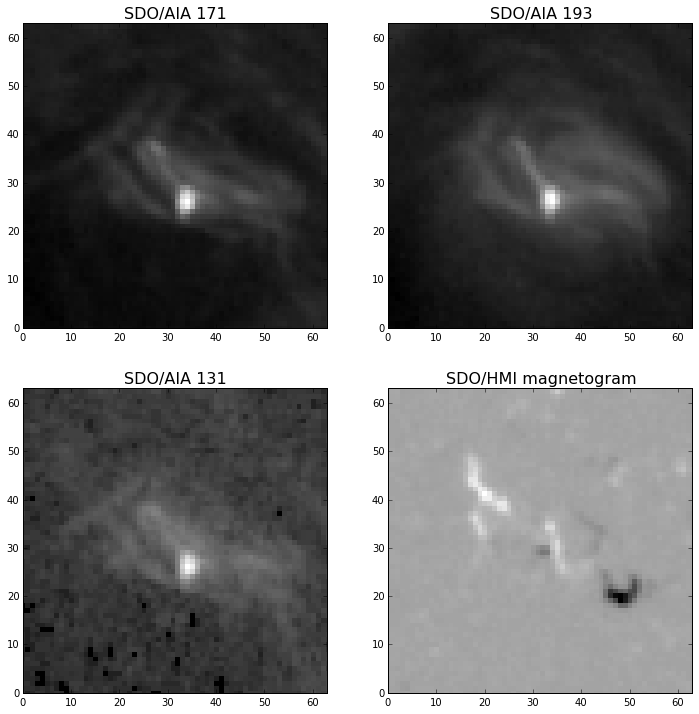

In [4]:
x, y = 34, 27
t = 490

plt.figure(figsize = (12,12))
plt.subplot(221)
plt.title('SDO/AIA 171', size = 16)
plt.imshow(aia_171[t,:,:]**0.3, 'gray', origin = 'lower', interpolation = 'nearest')
plt.axis((0,63,0,63))
#plt.plot(x, y, 'bs', alpha = 0.3, ms=20, mec='blue',mew = 2)
plt.subplot(222)
plt.title('SDO/AIA 193', size = 16)
plt.imshow(aia_193[t,:,:]**0.3, 'gray', origin = 'lower', interpolation = 'nearest')
plt.axis((0,63,0,63))
#plt.plot(x, y, 'gs', alpha = 0.3, ms=20, mec='green',mew = 2)
plt.subplot(223)
plt.title('SDO/AIA 131', size = 16)
plt.imshow(aia_131[t,:,:]**0.3, 'gray', origin = 'lower', interpolation = 'nearest')
plt.axis((0,63,0,63))
#plt.plot(x, y, 'rs', alpha = 0.3, ms=20, mec='red',mew = 2)
plt.subplot(224)
plt.title('SDO/HMI magnetogram', size = 16)
plt.imshow(hmi[t*12/45,:,:], 'gray', origin = 'lower', interpolation = 'nearest')
plt.axis((0,63,0,63))
#plt.plot(x, y, 'ys', alpha = 0.3, ms=20, mec='yellow',mew = 2)

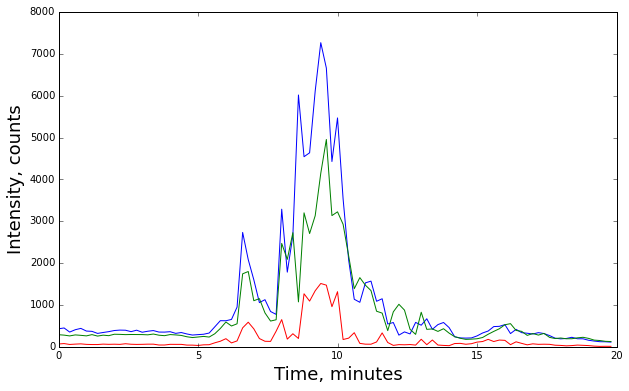

In [5]:
x, y = 34, 27
t = np.arange(0,100)
plt.figure(figsize = (10,6))
plt.xlabel('Time, minutes', size = 18)
plt.ylabel('Intensity, counts', size = 18)
plt.plot(t*12/60., aia_171[t+450,y,x])
plt.plot(t*12/60., aia_193[t+450,y,x])
plt.plot(t*12/60., aia_131[t+450,y,x])

5.7389523481e+25


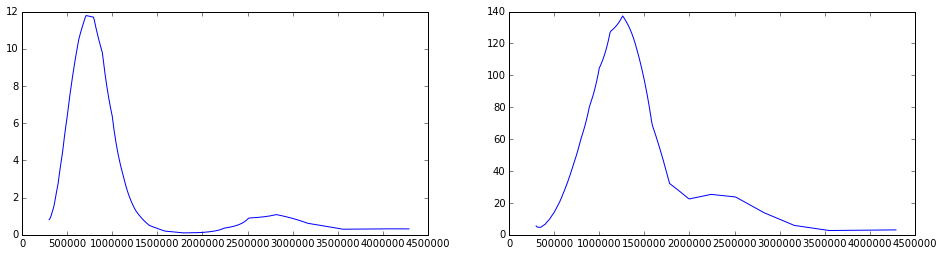

In [6]:
T = np.arange(0,400)*1e4 + 3e5
plt.figure(figsize = (16,4))
plt.subplot(121)
plt.plot(T,AIA.t171(T)/AIA.t193(T))
plt.subplot(122)
plt.plot(T,AIA.t171(T)/AIA.t131(T))
print np.sqrt(7000/AIA.t171(3e6))*(3*4.2e7)**2.5*1.2e6*2*Sun.k_b
#plt.plot(T,AIA.t193(T))

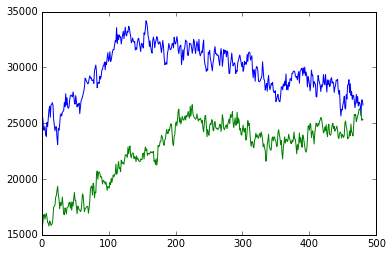

In [7]:
plt.plot(np.sum(hmi.clip(min=0),axis=(1,2)))
plt.plot(-np.sum(hmi.clip(max=0),axis=(1,2)))

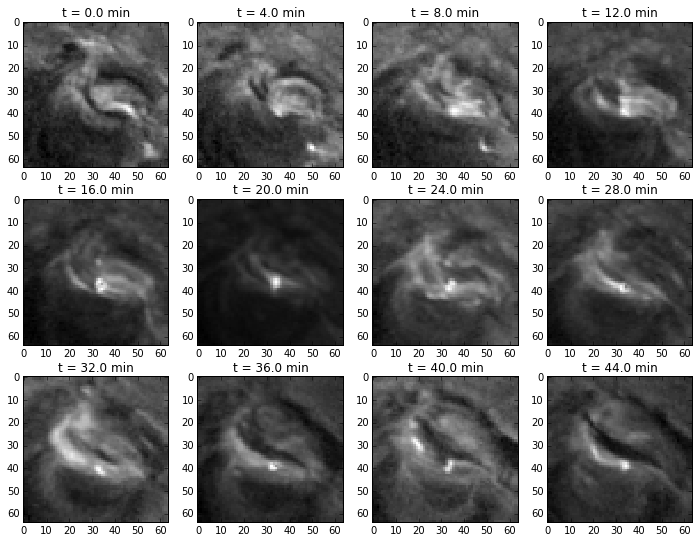

In [8]:
plt.figure(figsize=(12,9))
for j in range(0,3):
    for i in range(0,4):
        plt.subplot(3,4,i+j*4+1)  
        t = ((i+4*j)*20)
        plt.title('t = '+ str(t*12./60) + ' min')
        plt.imshow(np.flipud(aia_171[t+400,:,:])**0.3, 'gray', interpolation = 'nearest')

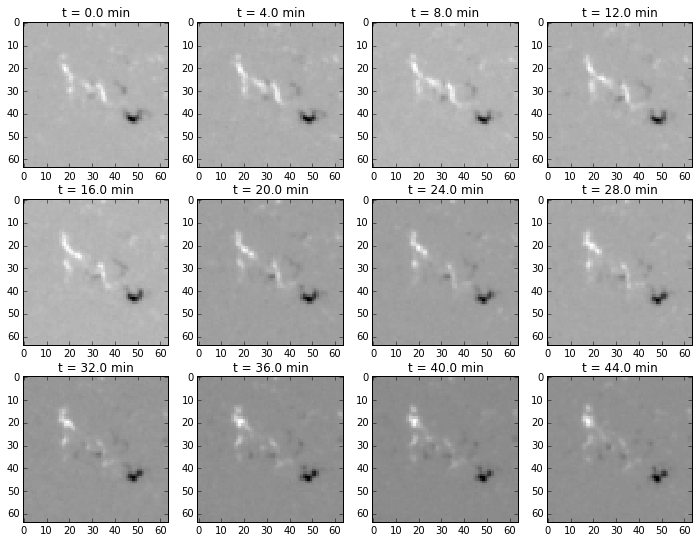

In [9]:
plt.figure(figsize=(12,9))
for j in range(0,3):
    for i in range(0,4):
        plt.subplot(3,4,i+j*4+1)
        t = ((i+4*j)*20)
        plt.title('t = '+ str(t*12./60) + ' min')
        plt.imshow(np.flipud(hmi[400*12/45+(i+4*j)*20*12/45,:,:]), 'gray', interpolation = 'nearest')

[ 6650.  4525.  2532.  -499. -1602. -9781.] [[ 18.9481203   34.36950276  26.93601896  29.85771543  42.82084894
   47.90461098]
 [ 40.03909774  31.95977901  35.21248025  29.7254509   33.54244694
   21.04999489]
 [  0.           0.           0.           0.           0.           0.        ]]


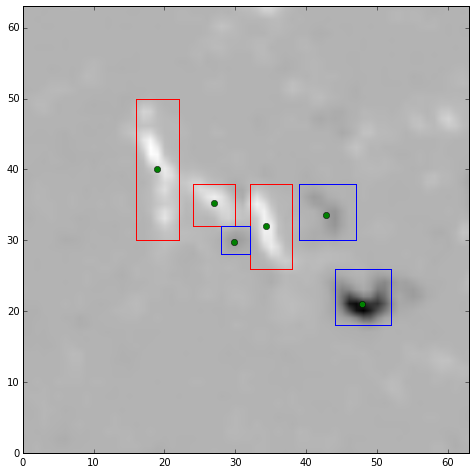

In [4]:
def square(x,y,dx,dy, color='green'):
    plt.plot([x-dx/2,x+dx/2],[y-dy/2,y-dy/2], color)
    plt.plot([x-dx/2,x+dx/2],[y+dy/2,y+dy/2], color)
    plt.plot([x-dx/2,x-dx/2],[y-dy/2,y+dy/2], color)
    plt.plot([x+dx/2,x+dx/2],[y-dy/2,y+dy/2], color)

t = 440*12/45
nt = 10
data = np.sum(hmi[t-nt:t,:,:], axis=0)/nt
fig = plt.figure(figsize=(8,8))
plt.imshow(data, 'gray', origin = 'lower')
plt.axis((0,63,0,63))
#plt.plot(20, 40, 'bs', alpha = 0.3, ms=200, mec='blue',mew = 2)

x = [19,35,27,30,43,48]
y = [40,32,35,30,34,22]
dx = [6,6,6,4,8,8]
dy = [20,12,6,4,8,8]
color = ['r','r','r','b','b','b']

qc = np.zeros((6,))
xc = np.zeros((3,6))


for i in range(0,6):
    square(x[i],y[i],dx[i],dy[i],color[i])
    temp = data[y[i]-dy[i]/2:y[i]+dy[i]/2,x[i]-dx[i]/2:x[i]+dx[i]/2]
    if color[i] == 'r':
        temp = temp.clip(min = 0)
    else:
        temp = temp.clip(max = 0)
    qc[i] = np.sum(temp)
    yy, xx = np.mgrid[-dy[i]/2:dy[i]/2,-dx[i]/2:dx[i]/2]
    
    xc[0,i] = np.sum(xx*temp)/qc[i] + x[i]
    xc[1,i] = np.sum(yy*temp)/qc[i] + y[i]
    
    plt.plot(xc[0,i],xc[1,i],'go')
    
print qc, xc

In [5]:
field = Field(data,1.)
field.set_charges(qc,xc)
field.search_nulls()
#field.draw_footprint()

Searching nulls...
Done! Elapsed time: 0.235000133514


<topology.Field instance at 0x032FDD00>

Searching nulls...
Done! Elapsed time: 0.233000040054


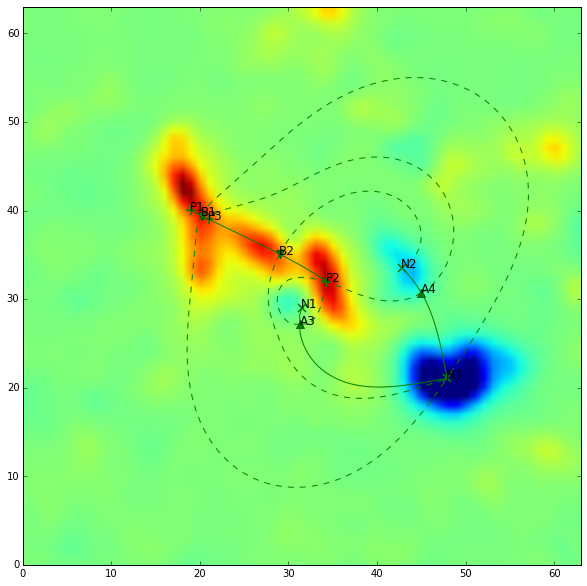

<topology.Field instance at 0x0DD85120>

In [6]:
fig = plt.figure(figsize=(10,10))
field = Field(data,1.)
field.set_charges(qc,xc)

for i in range(0,field.n_charges):
    if field.Charges[i].name == 'P3':
        field.Charges[i].x = [21,39,0.]
    if field.Charges[i].name == 'N1':
        field.Charges[i].x = [31.5,29,0.]

field.search_nulls()
field.draw_footprint(fig)

In [14]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
#flines = []

n = 25

for i in range(0,field.n_nulls):
    if field.Nulls[i].name == 'B2':
        null = field.Nulls[i]

v1 = null.eigen[1][:,1]
v2 = null.eigen[1][:,2]

for i in range(0,n):
    a = np.pi*i/n
    fline = field.rk2(null.x+np.cos(a)*v1+np.sin(a)*v2)[0]  
    ax.plot(fline[0],fline[1],fline[2], color='green')

        
for i in range(0,field.n_nulls):
    if field.Nulls[i].name == 'A3':
        null = field.Nulls[i]

v1 = null.eigen[1][:,0]
v2 = null.eigen[1][:,2]

for i in range(0,n):
    a = np.pi*i/n
    fline = field.rk2(null.x+np.cos(a)*v1+np.sin(a)*v2, mul = -1)[0]  
    ax.plot(fline[0],fline[1],fline[2], color='red')
    

for i in range(0,field.n_nulls):
    if field.Nulls[i].name == 'A4':
        null = field.Nulls[i]

v1 = null.eigen[1][:,0]
v2 = null.eigen[1][:,2]

for i in range(0,n):
    a = np.pi*i/n
    fline = field.rk2(null.x+np.cos(a)*v1+np.sin(a)*v2, mul = -1)[0]  
    ax.plot(fline[0],fline[1],fline[2], color='blue')

    
    
#for i in range(0,100):
#    r = np.random.random((2,))
#    fline = field.fline([r[0]*16+24,r[1]*16+24,1])
#    ax.plot(fline.verts[0],fline.verts[1],fline.verts[2], color='gray') 
  
    

In [14]:
null.eigen

(array([-53.31829726,  91.78732583, -38.46902857]),
 array([[-0.99966218,  0.0259909 ,  0.        ],
        [-0.0259909 , -0.99966218,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

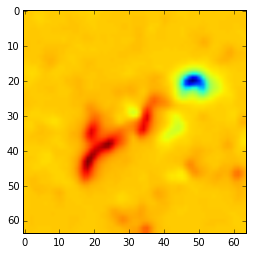

In [24]:
plt.imshow(field.data[0])

Searching charges...
Done! Elapsed time: 0.0
N1 [ 47.91927159  19.91102235   0.        ] -272.376998838
P1 [ 36.83164334  25.8631093    0.        ] 44.2547937974
N2 [ 31.14325672  29.08309772   0.        ] -33.5031956354
P2 [ 34.67547648  30.67863065   0.        ] 88.9931796542
N3 [ 43.62760214  33.49016063   0.        ] -39.715158492
P3 [ 19.07799284  34.75260691   0.        ] 86.3265490029
P4 [ 33.7587965   33.56564596   0.        ] 86.0002876106
P5 [ 23.60049713  38.35360725   0.        ] 118.271492589
P6 [ 18.27020782  42.83558934   0.        ] 120.999836155
P7 [ 47.31069787  44.0115671    0.        ] 26.9749686132
P8 [ 60.71803865  46.43153093   0.        ] 37.9385474616
P9 [ 28.04736741  59.721479     0.        ] 26.6192028534
P10 [ 34.50094677  62.61065972   0.        ] 49.2327014617
Searching nulls...
Done! Elapsed time: 0.746999979019


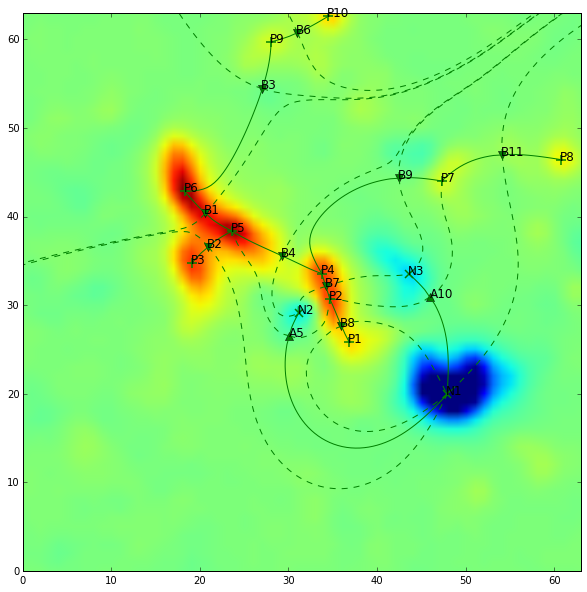

<pyfield.Field instance at 0x0E235238>

In [25]:
t = 490*12/45
nt = 10
data = np.sum(hmi[t-nt:t,:,:], axis=0)/nt

fig = plt.figure(figsize=(8,8))
#plt.imshow(data, 'gray', origin = 'lower')

field = Field(data,1.).search_charges(25)

for i in range(0,field.n_charges):
    print field.Charges[i].name, field.Charges[i].x, field.Charges[i].q

field.search_nulls()
field.draw_footprint()

Searching charges...
Done! Elapsed time: 0.0
Searching nulls...
Done! Elapsed time: 0.563999891281


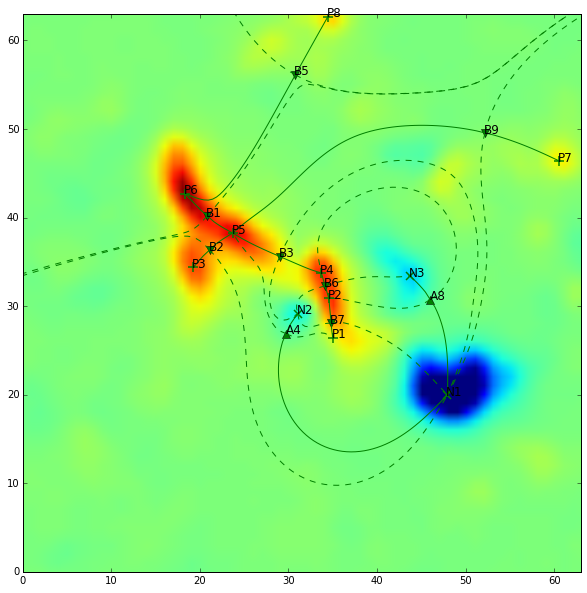

<pyfield.Field instance at 0x1A7093C8>

In [26]:
t = 500*12/45
nt = 20
data = np.sum(hmi[t-nt:t,:,:], axis=0)/nt

fig = plt.figure(figsize=(8,8))
#plt.imshow(data, 'gray', origin = 'lower')

field = Field(data,1.).search_charges(25)
for i in range(0,field.n_charges):
    if field.Charges[i].name == 'P1':
        field.Charges[i].x[0] = 35.
    #if field.Charges[i].name == 'P5':
    #    field.Charges[i].x = [22.,42.,0.]
field.search_nulls()
field.draw_footprint()

Searching charges...
Done! Elapsed time: 0.0
Searching nulls...
Done! Elapsed time: 0.654000043869
N1 [ 48.09041464  19.59052242   0.        ] -273.965912154
P1 [ 35.91157775  25.91130675   0.        ] 48.9969191819
P2 [ 39.80972103  25.92267744   0.        ] 29.5550400259
N2 [ 31.84909934  29.005738     0.        ] -38.0543822533
P3 [ 34.80183638  30.7234153    0.        ] 62.3583271781
N3 [ 43.89352268  33.56947088   0.        ] -37.2000121498
P4 [ 33.42743931  33.59706011   0.        ] 75.6198306467
P5 [ 18.30554998  34.98503403   0.        ] 93.1073144838
N4 [ 41.87928389  34.8208953    0.        ] -27.9702401844
P6 [ 22.23024446  39.62941937   0.        ] 123.125858089
P7 [ 19.42192041  41.67140019   0.        ] 137.921416882
P8 [ 61.15122546  46.36417339   0.        ] 33.2076971187
P9 [ 34.46687839  62.63374093   0.        ] 50.3290401444


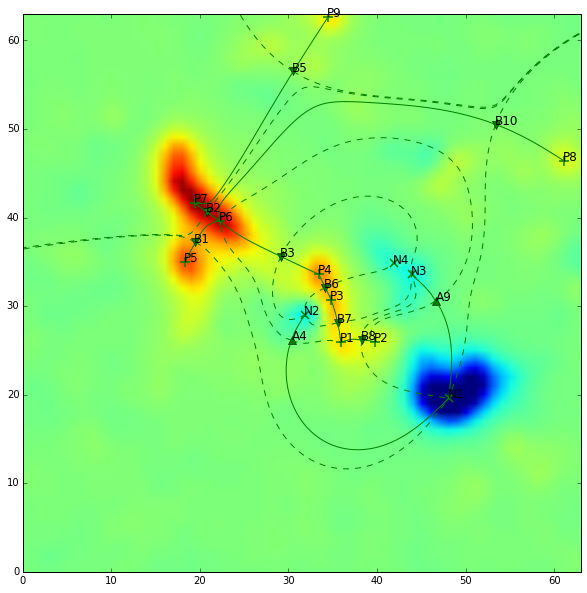

<pyfield.Field instance at 0x1A61E058>

In [27]:
t = 540*12/45
nt = 20
data = np.sum(hmi[t-nt:t,:,:], axis=0)/nt

fig = plt.figure(figsize=(8,8))
#plt.imshow(data, 'gray', origin = 'lower')

field = Field(data,1.).search_charges(25).search_nulls()
for i in range(0,field.n_charges):
    print field.Charges[i].name, field.Charges[i].x, field.Charges[i].q

field.draw_footprint()

In [28]:
def generate_fname(ext):
    systime = datetime.now()
    hms = str(systime.hour).zfill(2)+str(systime.minute).zfill(2)+str(systime.second).zfill(2)
    return hms+ext

def write_video(data, start, stop, vmin, vmax, a=0.4, fps = 30):
    shape = data.shape
    
    video_dir = 'q:/video'
    fname = video_dir+'/'+generate_fname('.avi')
    video = cv2.VideoWriter(fname,cv2.VideoWriter_fourcc('X','2','6','4'),fps,shape[1:3])
    pbyData = np.zeros(shape[1:3], dtype = np.ubyte)

    for i in range(start, stop):
        pbyData = ((np.flipud(data[i,:,:]).clip(min=vmin, max=vmax)-vmin)**a/(vmax-vmin)**a*255).astype(np.ubyte)
        video.write(pbyData)
        
    video.release()
    
    


In [29]:
vmin = 55
vmax = 4e3

write_video(aia_171, 350, 750, vmin, vmax, 0.7)

In [11]:
np.random.random((3,))

array([ 0.28701452,  0.52041827,  0.73959516])